In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

In [2]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional
from keras.utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix


In [3]:
number_of_samples = 5700

In [4]:
data_good = pd.read_csv('C:/Users/Dell/Desktop/Data/good.csv')

In [5]:
data_bad=pd.read_csv('C:/Users/Dell/Desktop/Data/bad1.csv')

In [6]:
 data_good.columns=[ 'Method','path','body','single_q','double_q','dashes','braces','spaces','badwords','class']
 data_bad.columns=[ 'Method','path','body','single_q','double_q','dashes','braces','spaces','badwords','class']

In [7]:
 data_bad

,Method,path,body,single_q,double_q,dashes,braces,spaces,badwords,class
0,GET,/vulnerabilities/sqli/?id=%27union+select+%40%...,NaN,1,0,0,0,2,2,bad
1,GET,/pubapi/3.0/11526.1/4938388/0/0/ADTECH;v=2;cmd...,NaN,0,0,0,0,0,0,bad
2,GET,/vulnerabilities/sqli/?id=SELECT+current_user%...,NaN,0,0,0,0,1,0,bad
3,GET,/hb?pt=net&auids=9701%2C9698&sizes=970x250%2C3...,NaN,0,0,0,0,0,1,bad
4,POST,/translator?source=prebid-client,NaN,0,0,0,0,0,0,bad
...,...,...,...,...,...,...,...,...,...,...
5733,GET,/dvwa/vulnerabilities/xss_r/?name=penis&user_t...,NaN,0,0,0,0,0,0,bad
5734,GET,/dvwa/vulnerabilities/xss_r/?name=rabbit&user_...,NaN,0,0,0,0,0,0,bad
5735,GET,/dvwa/vulnerabilities/xss_r/?name=apollo&user_...,NaN,0,0,0,0,0,0,bad
5736,GET,/dvwa/vulnerabilities/xss_r/?name=fucking&user...,NaN,0,0,0,0,0,0,bad


In [8]:
data_good=data_good.drop(labels=['Method','path','body'],axis=1)
data_bad=data_bad.drop(labels=['Method','path','body'],axis=1)

In [9]:
features=['single_q','double_q','dashes','braces','spaces','badwords']



In [10]:
data_good

,single_q,double_q,dashes,braces,spaces,badwords,class
0,0,0,0,0,0,0,good
1,0,0,0,0,0,0,good
2,0,0,0,0,0,0,good
3,0,0,0,0,0,0,good
4,0,0,0,0,0,0,good
...,...,...,...,...,...,...,...
13078,0,0,0,0,0,0,good
13079,0,0,0,0,0,0,good
13080,0,0,0,0,0,0,good
13081,0,0,0,0,0,0,good


In [11]:
X_good= data_good[features].values
X_bad= data_bad[features].values
Y_good= data_good['class']
Y_bad= data_bad['class']
X=np.concatenate((X_good,X_bad))
Y=np.concatenate((Y_good,Y_bad))

In [13]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
scalar.fit(X)
X = scalar.transform(X)

In [14]:
for i in range(0,len(Y)):
  if Y[i] =="bad":
    Y[i]=0
  else:
    Y[i]=1

In [15]:
features = len(X[0])
samples = X.shape[0]
train_len = 25
input_len = samples - train_len
I = np.zeros((samples - train_len, train_len, features))

for i in range(input_len):
    temp = np.zeros((train_len, features))
    for j in range(i, i + train_len - 1):
        temp[j-i] = X[j]
    I[i] = temp

In [16]:
X.shape

(18821, 6)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(I, Y[25:100000], test_size = 0.2)

In [18]:
def create_baseline():
    model = Sequential()
    
    model.add(Bidirectional(LSTM(64, activation='tanh', kernel_regularizer='l2')))
    model.add(Dense(128, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(1, activation = 'sigmoid', kernel_regularizer='l2'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [19]:
model = create_baseline()

In [20]:
history = model.fit(X_train.astype(np.float32), Y_train.astype(np.float32), epochs = 20,validation_split=0.2, verbose = 1)

Epoch 1/20
376/376 [==============================] - 11s 15ms/step - loss: 0.4975 - accuracy: 0.9254 - val_loss: 0.2697 - val_accuracy: 0.9318
Epoch 2/20
376/376 [==============================] - 4s 11ms/step - loss: 0.2636 - accuracy: 0.9256 - val_loss: 0.2562 - val_accuracy: 0.9309
Epoch 3/20
376/376 [==============================] - 4s 11ms/step - loss: 0.2677 - accuracy: 0.9235 - val_loss: 0.2741 - val_accuracy: 0.9269
Epoch 4/20
376/376 [==============================] - 4s 11ms/step - loss: 0.2782 - accuracy: 0.9242 - val_loss: 0.2578 - val_accuracy: 0.9322
Epoch 5/20
376/376 [==============================] - 5s 12ms/step - loss: 0.2684 - accuracy: 0.9243 - val_loss: 0.2617 - val_accuracy: 0.9295
Epoch 6/20
376/376 [==============================] - 4s 12ms/step - loss: 0.2707 - accuracy: 0.9246 - val_loss: 0.2499 - val_accuracy: 0.9325
Epoch 7/20
376/376 [==============================] - 5s 12ms/step - loss: 0.2666 - accuracy: 0.9257 - val_loss: 0.2524 - val_accuracy: 0.933

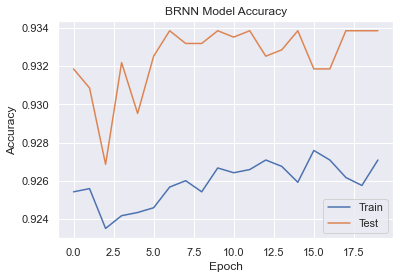

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BRNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
#plt.savefig('BRNN Model Accuracy.png')
plt.show()

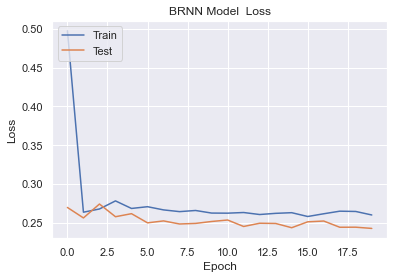

In [22]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BRNN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('BRNN Model Loss.png')
plt.show()

In [38]:
%%time
predict = model.predict(X_test, verbose=1)

118/118 [==============================] - 1s 5ms/step
Wall time: 1.61 s


In [28]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

In [36]:
tp = 2512
tn = 843
fp = 143
fn = 148

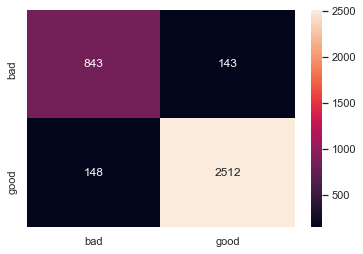

In [37]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["bad","good"],columns = ["bad","good"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")